<a href="https://colab.research.google.com/github/SachinSPanchal/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [65]:
import warnings
warnings.filterwarnings('ignore')

# <b> Collecting Data </b>

In [66]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
path = "/content/Hotel Bookings (2).csv"

In [69]:
hotel_df = pd.read_csv(path)

In [70]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [71]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [72]:
hotel_df.shape

(119390, 32)

In [73]:
#Basic Informations of our dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

###  This dataset contains the information about various hotels across the globe, type of hotel, records on type of customers, number of customers, length of stay, number of adults, children, bookings made across different timelines, etc, etc.,

###  We have only focused on certain variables for our data exploration which are the key aspects which impacts alot for our analysis on our data.
###  So, now, we would proceed further for the steps involved in our analysis.

# <b> Data Cleaning </b>

In [74]:
hotel_df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [78]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

###We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.###

In [77]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [75]:
#Checking the number of null values in each columns
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We are replacing all the null values with 'Mean values' for 'Numerical Variable' and with 'Absent' for 'categorical Variables'.

In [76]:
data["children"].fillna(data["children"].mean(),inplace = True)
data["country"].fillna("Absent",inplace = True)
data["agent"].fillna(data["agent"].mean(),inplace = True)
data["company"].fillna(data["company"].mean(),inplace = True)

In [79]:
#Ensure there is no null value in our dataset.
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# <b> Exploratory Data Analysis </b>

([<matplotlib.patches.Wedge at 0x7fd41d7bff90>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.6%')])

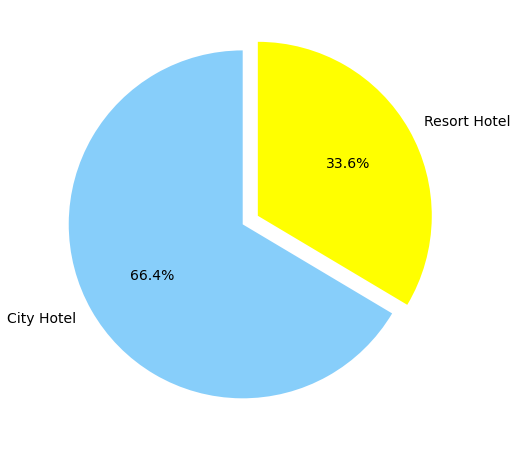

In [80]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = data['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = data['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightskyblue','yellow']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})


##What do we see here?##
It seems that a huge proportion of hotels was city hotel. Resort hotel tend to be on the expensive side and most people will just stick with city hotel.
Also, resort hotels tend to be appropriate for larger group of people.
Let's have an overview of the number of people who booked the hotel.

In [82]:
# Looking into adults. 
# Using groupby to group according to hotel types only.
data['adults'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [83]:
# Looking into children. 
# Using groupby to group according to hotel types only.
data['children'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,0.091370,0.372167,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


###It seems that mean values for adults and children are higher. This means that resort hotels are better choice for large families.###

# <b> Overview of Cancelled Bookings

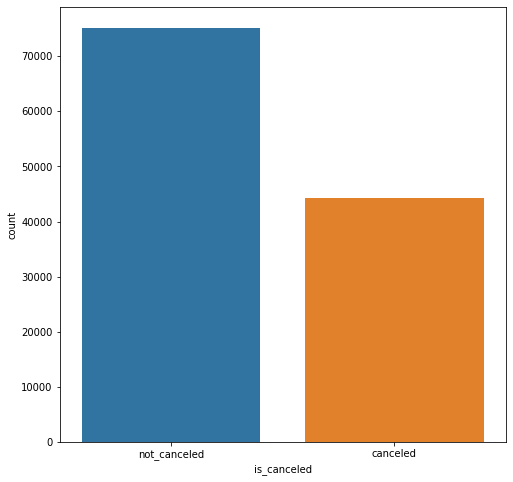

In [87]:
data['is_canceled'] = data.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = data['is_canceled']
sns.countplot(canceled_data)

###It seems that majority of the bookings were not canceled.###

## Let's look into cancellation rate among different type of hotel. ##

Text(0.5, 1.0, 'Graph showing cancellation rates in city and resort hotel')

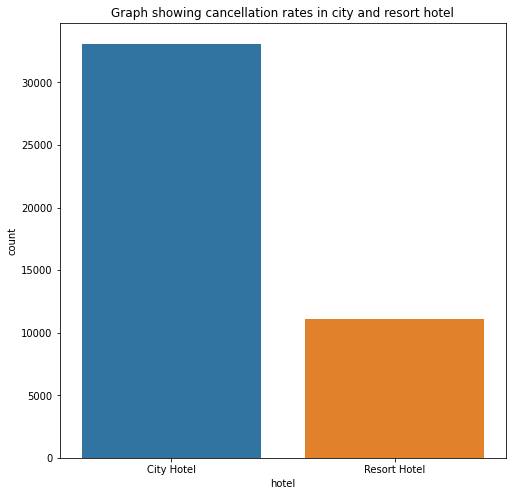

In [92]:
lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = data[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Graph showing cancellation rates in city and resort hotel')


###we have seen a huge proportion of cancellation from city hotel. This was expected since 3/4 of the hotel bookings belong to city hotels.###

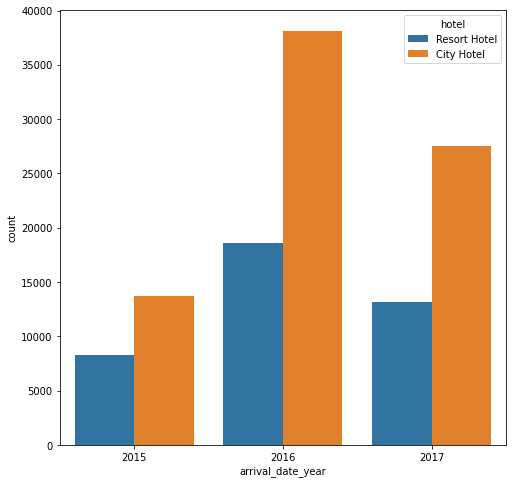

In [93]:
lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = data[lst3]
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel')

Text(0, 0.5, 'Count')

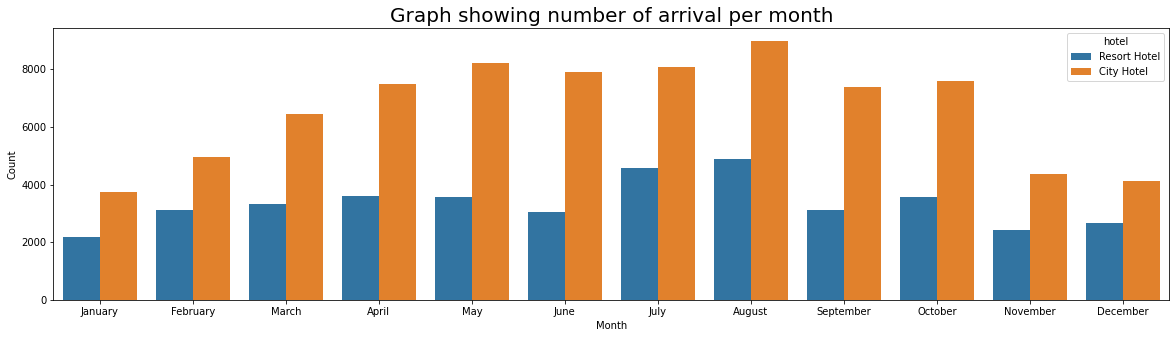

In [94]:
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

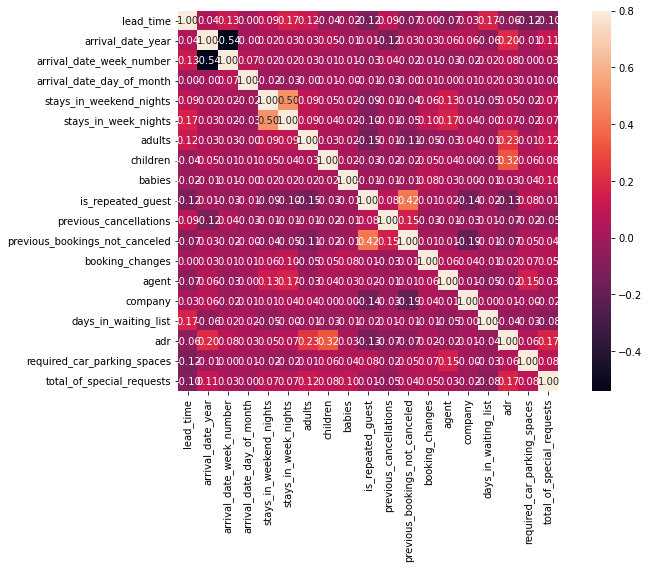

In [98]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

## Univariate Analysis

1) Which agent makes most no. of bookings?

In [100]:
data = pd.DataFrame(df1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
data.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
data = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

KeyError: ignored